In [1]:
1 + 1

2

In [1]:
# using Distributed
# if nprocs() == 1 addprocs(4) end

using MLToolkit: flatten_dict, dict2namedtuple
using Random: seed!

using Revise
using RMMMDNets

;

┌ Info: Recompiling stale cache file /afs/inf.ed.ac.uk/user/s16/s1672897/.julia/compiled/v1.2/RMMMDNets/mJmbq.ji for RMMMDNets [7ea7fd3b-14e3-4223-94d2-c341911ad28e]
└ @ Base loading.jl:1240


In [99]:
dataset = "gaussian"
# dataset = "ring"
# dataset = "mnist"

# model_name = "mmdnet"
model_name = "rmmmdnet"

include("scripting.jl")

args, exp_name = get_args(
    dataset, 
    model_name;
    override=Dict{Symbol,Any}(
        :opt => "adam",
        :lr => 2f-4,
#         :σs => "5,10,20,40", # mnist
#         :σs => "1,3,5", # ring
    ),
    suffix="fixtraining"
)

###

data = get_data(dataset)

;

┌ Info: On dataset gaussian with args
│   batch_size_gen = 500
│   batch_size = 500
│   σ_last = identity
│   D_z = 5
│   D_fx = 2
│   σ = tanh
│   opt = adam
│   n_epochs = 200
│   D_h = 50,50
│   σs = 1,2
│   lr = 0.0002
└ @ Main /afs/inf.ed.ac.uk/user/s16/s1672897/projects/RMMMDNets.jl/scripting.jl:69


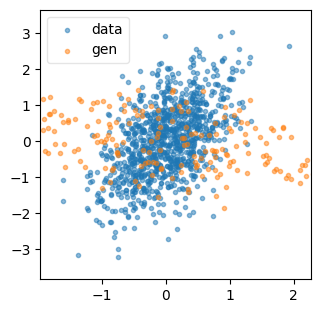

┌ Info: Init rmmmdnet with 6,154 parameters
│   logdir = gaussian/rmmmdnet/opt=adam-σ=tanh-D_h=50,50-σs=1,2-D_fx=2-D_z=5/20092019-0-58-38
└ @ RMMMDNets /afs/inf.ed.ac.uk/user/s16/s1672897/projects/RMMMDNets.jl/src/RMMMDNets.jl:130


In [100]:
seed!(1234)

model = get_model(model_name, args, data, exp_name)

vis(data, model)

###

dataloader = DataLoader(data, args.batch_size)

;

In [101]:
train!(model, args.n_epochs, dataloader, args.batch_size_gen)

;

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:44

InterruptException: InterruptException: